This notebook builds a classification model using supervised machine learning algorithm We will be working on a dataset from dropbox with a combination of categorical and numerical variables. The dataset looks at population of different ages and classifies them ob the basis of their liklihood of experiencing heart attack. This dataset has 8 variables including

- 'cp' : The type of chest pain they experience 

Value 1: typical angina 
Value 2: atypical angina 
Value 3: non-anginal pain 
Value 4: asymptomatic

- 'restecg' : resting electrocardiographic results Value 0: normal 

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria

- 'thalach' : maximum heart rate achieved during exercise

- 'output' : the doctor’s diagnosis of whether the patient is at risk for a heart attack

0 = not at risk of heart attack 
1 = at risk of heart attack

- 'age' : Age of the patient

- 'sex' : sex of the patient

- 'trtbps' : resting blood pressure (in mm Hg)

- 'chol' : cholesterol in mg/dl fetched via BMI sensor

The data needed some preprocessing. Variables 'cp' and 'restecg' were catagorical variables with multiple levels. In order to make a robust model, we need to essentially pivot these level to binary forms, or also called 'one-hot encoding' this will allow the model to classify and predict better on the basis of their neighbour. We will use the get_dummies function in pandas library for that.

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_csv("heart_attack.csv")

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      273 non-null    int64
 1   sex      273 non-null    int64
 2   cp       273 non-null    int64
 3   trtbps   273 non-null    int64
 4   chol     273 non-null    int64
 5   restecg  273 non-null    int64
 6   thalach  273 non-null    int64
 7   output   273 non-null    int64
dtypes: int64(8)
memory usage: 17.2 KB


In [87]:
data.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


Since the 'restecg' and 'cp' is a multiple level categorical variable, we need to pivot them into binary forms also called 'one-hot encoding' using the pandas library 

In [88]:
# cp and rest ecg need to be one-hot encoded into binary form 
data_new = pd.get_dummies(data, columns =['restecg'], drop_first = True)
data = pd.get_dummies(data_new, columns=['cp'], drop_first = True)
data

,age,sex,trtbps,chol,thalach,output,restecg_1,restecg_2,cp_1,cp_2,cp_3
0,63,1,145,233,150,1,0,0,0,0,1
1,37,1,130,250,187,1,1,0,0,1,0
2,56,1,120,236,178,1,1,0,1,0,0
3,57,0,120,354,163,1,1,0,0,0,0
4,57,1,140,192,148,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
268,59,1,164,176,90,0,0,0,0,0,0
269,57,0,140,241,123,0,1,0,0,0,0
270,45,1,110,264,132,0,1,0,0,0,1
271,68,1,144,193,141,0,1,0,0,0,0


In [89]:
# spliting the data into test and train dataset 

target = data['output']
inputs = data.drop(['output'], axis =1)
inputs

,age,sex,trtbps,chol,thalach,restecg_1,restecg_2,cp_1,cp_2,cp_3
0,63,1,145,233,150,0,0,0,0,1
1,37,1,130,250,187,1,0,0,1,0
2,56,1,120,236,178,1,0,1,0,0
3,57,0,120,354,163,1,0,0,0,0
4,57,1,140,192,148,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
268,59,1,164,176,90,0,0,0,0,0
269,57,0,140,241,123,1,0,0,0,0
270,45,1,110,264,132,1,0,0,0,1
271,68,1,144,193,141,1,0,0,0,0


In [90]:
# normalising the data 
inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs)).values
inputs

,age,sex,trtbps,chol,thalach,restecg_1,restecg_2,cp_1,cp_2,cp_3
0,0.708333,1.0,0.481132,0.244292,0.603053,0.0,0.0,0.0,0.0,1.0
1,0.166667,1.0,0.339623,0.283105,0.885496,1.0,0.0,0.0,1.0,0.0
2,0.562500,1.0,0.245283,0.251142,0.816794,1.0,0.0,1.0,0.0,0.0
3,0.583333,0.0,0.245283,0.520548,0.702290,1.0,0.0,0.0,0.0,0.0
4,0.583333,1.0,0.433962,0.150685,0.587786,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
268,0.625000,1.0,0.660377,0.114155,0.145038,0.0,0.0,0.0,0.0,0.0
269,0.583333,0.0,0.433962,0.262557,0.396947,1.0,0.0,0.0,0.0,0.0
270,0.333333,1.0,0.150943,0.315068,0.465649,1.0,0.0,0.0,0.0,1.0
271,0.812500,1.0,0.471698,0.152968,0.534351,1.0,0.0,0.0,0.0,0.0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
             inputs, data['output'], test_size = 0.2, random_state=50)

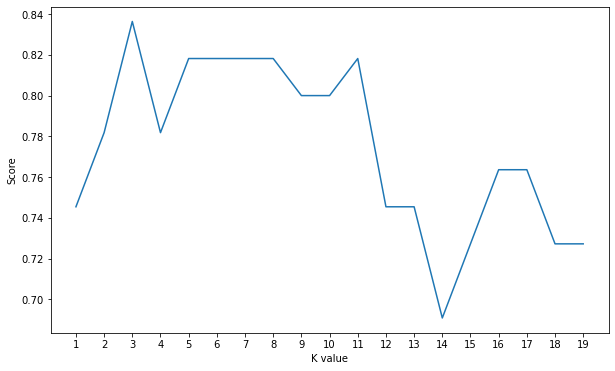

Maximum KNN Score is 83.64%


In [92]:
accuracy = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracy['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

It is not always easy to figure out the optimal k value, we will use the elbow vizualiser to get the optimal value 

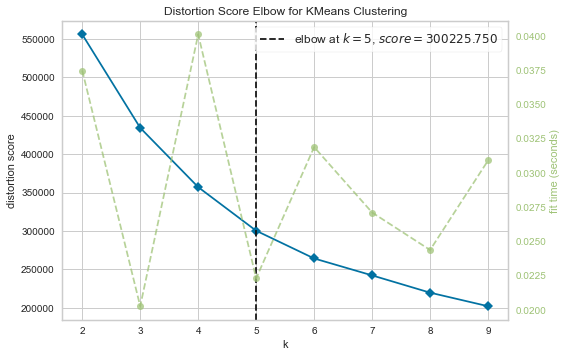

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

From the visualisation, when k = 5, the distortion score is 300225.70

In [122]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print("roc auc score: ")
print(roc_auc_score(y_test, pred))
print('\n')
print('accuracy score:')
print(accuracy_score(y_test, pred))


WITH K=5


[[18  6]
 [ 4 27]]


              precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.82      0.87      0.84        31

    accuracy                           0.82        55
   macro avg       0.82      0.81      0.81        55
weighted avg       0.82      0.82      0.82        55



roc auc score: 
0.810483870967742


accuracy score:
0.8181818181818182
accuracy:  0.8181818181818182


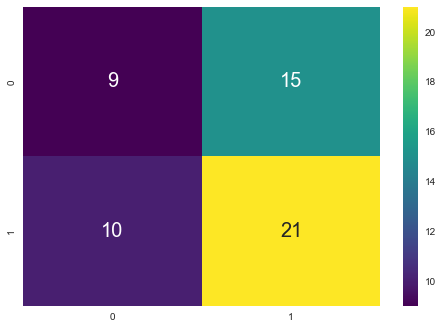

In [110]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)
predicted_value=clf.predict(x_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()